In [41]:
import numpy as np
import scipy.io.wavfile as wav
from scipy import signal
import matplotlib.pyplot as plt
from IPython.core.display import HTML
from itertools import tee, izip

In [2]:
def wavPlayer(filepath):
    src = """
    <head>
    <meta http-equiv="Content-Type" content="text/html; charset=utf-8">
    <title>Simple Test</title>
    </head>
    
    <body>
    <audio controls="controls" style="width:600px" >
      <source src="files/%s" type="audio/wav" />
      Your browser does not support the audio element.
    </audio>
    </body>
    """%(filepath)
    display(HTML(src))

def barkScale (f):
    return 13 * np.arctan(0.00076 * f) + 3.5 * np.arctan(np.square(f/7500))

In [31]:
sampleRate, wd = wav.read("heart.wav")
wavData = wd #[:220000]

In [4]:
wav.write("h1.wav", 16000, wavData)

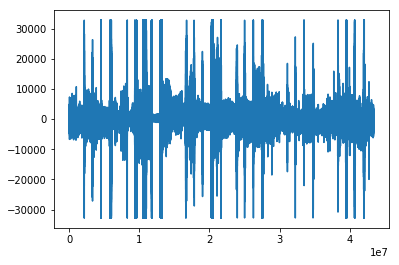

In [32]:
plt.plot(range(len(wavData)), wavData)
plt.show()

In [33]:
b, a = signal.cheby1(6, 0.0003, 0.045)
filtered_signal = signal.filtfilt(b, a, wavData)
hannWindow = signal.hann(1024)
f,t,Sxx = signal.spectrogram(filtered_signal,nperseg=1024, fs=sampleRate, window=hannWindow)

/home/nick/.local/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


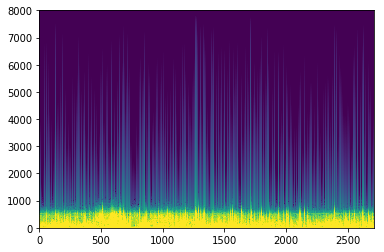

In [34]:
plt.pcolormesh(t,f,10 * np.log10(Sxx), vmin=-120, vmax=0)
plt.xlim(0, t[-1])
plt.ylim(0, f[-1])
plt.show()

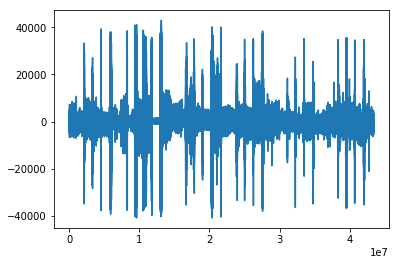

In [35]:
plt.plot(range(len(filtered_signal)), filtered_signal)
plt.show()

/home/nick/.local/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.


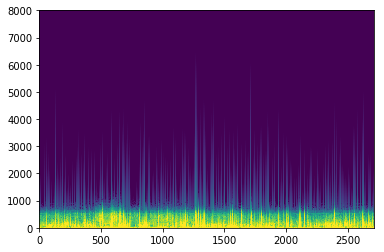

In [36]:
barkscaledSxx = np.copy(Sxx)
for i in range(len(barkscaledSxx)):
    barkscaledSxx[i] = barkScale(Sxx[i])
plt.pcolormesh(t, f, 10*np.log10(barkscaledSxx), vmin=-120, vmax=0)
plt.xlim(0, t[-1])
plt.ylim(0, f[-1])
plt.show()

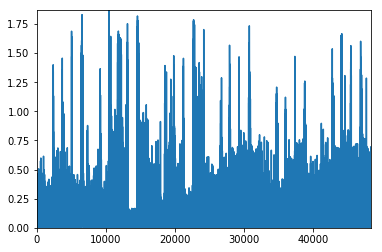

In [37]:
loudness = np.sum(barkscaledSxx, axis=0) / len(barkscaledSxx)
plt.plot(range(len(loudness)), loudness)
plt.axis([0, len(loudness), loudness.min(), loudness.max()])
plt.show()

In [ ]:
wavPlayer("h1.wav")

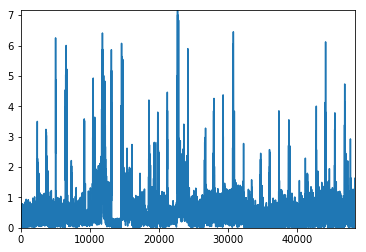

In [38]:
hann = np.hanning(10)
smoothLoudness = np.convolve(loudness, hann, 'full')[:len(loudness)]
plt.plot(range(len(loudness)), smoothLoudness)
plt.axis([0, len(loudness), smoothLoudness.min(), smoothLoudness.max()])
plt.show()

In [39]:
pts = []
for i in range(len(smoothLoudness)):
    if smoothLoudness[i] > 0.2:
        pts.append(round(i*len(wavData)/len(smoothLoudness)))

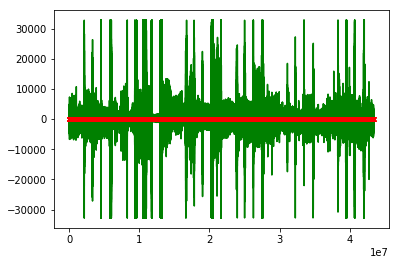

In [40]:
plt.plot(range(len(wavData)), wavData, zorder=1, color='g')
plt.plot(pts, [0 for i in range(len(pts))],color='r', markersize=4, marker='x', ls='', zorder=2)
plt.show()

In [71]:
i = 0
j = 0
slices = []
while j < len(pts):
    if pts[j] - pts[i] >= (3 * 16000):     # 3 seconds
        ix = int(pts[i])
        jx = int(pts[j])
        slices.append(wavData[ix:jx])
        i = j
    j += 1

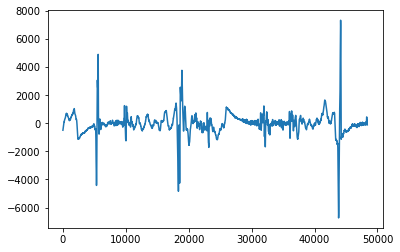

In [79]:
plt.plot(range(len(slices[0])), slices[0])
plt.show()

In [74]:
for i in range(len(slices)):
    wav.write("slices/slice_"+str(i)+".wav", 16000, slices[i])

In [84]:
wavPlayer("slices/slice_6.wav")